In [35]:
import pandas as pd
import pygwalker as pyg
import numpy as np
from scipy.stats import pearsonr
from matplotlib import pyplot as plt

In [36]:
df = pd.read_csv('dementia.csv',encoding='EUC_KR')
pyg.walk(df)

Box(children=(HTML(value='\n<div id="ifr-pyg-00061eea63ac90ed1y8IJHMR2QADKGae" style="height: auto">\n    <hea…

In [37]:
condition_city = df['시도']=='전국'
condition_province = df['시군구']=='전국'
condition_sex = (df['성별'] == '여') 
#condition_age = ~((df['연령별'].str.endswith('세이상')) & (df['연령별'] != '85세이상'))
# condition_age = (df['연령별'] == '60~64세') | (df['연령별'] == '65~69세')

combined_condition = condition_city&condition_sex&condition_province
filtered_data = df[combined_condition]
# output_file_path = 'filtered_data.csv'
# filtered_data.to_csv(output_file_path, index=False)

In [38]:
elder_quantity = filtered_data['노인인구수']
dementia_quantity = filtered_data['치매환자수']
dementia_prevalence = filtered_data['치매환자유병률']
severe_patient = filtered_data['최경도 환자']
mild_patient = filtered_data['경도 환자']
moderate_patient = filtered_data['중등도 환자']
serious_patient = filtered_data['중증 환자']
alzheimers_quantity = filtered_data['알츠하이머 환자수']
alzheimers_prevalence = filtered_data['알츠하이머 환자유병률']
vascular_dementia_quantity = filtered_data['혈관성치매 환자수']
vascular_dementia_prevalence = filtered_data['혈관성치매 환자유병률']
other_patients_quantity = filtered_data['기타 환자환자수']
other_patients_prevalence = filtered_data['기타 환자유병률']
cognitive_impairment_quantity = filtered_data['경도인지장애 환자수']
cognitive_impairment_prevalence = filtered_data['경도인지장애 환자유병률']

In [39]:
def age_to_numeric(age_group):
    if '~' in age_group:
        start_age, end_age = age_group.split('~')
        return (int(start_age) + int(end_age[:-1])) / 2  # 排除 '세' 字符
    elif '세이상' in age_group:
        return int(age_group[:-3])  # 处理 '85세이상' 的情况
    return np.nan

# 将'연령별'列转换为数值
filtered_data['연령별_numeric'] =filtered_data['연령별'].apply(age_to_numeric)
age = filtered_data['연령별_numeric']

C:\Users\a normal person\AppData\Local\Temp\ipykernel_26816\2803483145.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['연령별_numeric'] =filtered_data['연령별'].apply(age_to_numeric)


In [40]:
print(f'{dementia_prevalence=}')
print(f'{age=}')

dementia_prevalence=16        0.11
17        0.96
18        3.16
19       13.76
20       23.26
21       32.97
22        8.04
23       11.34
7084      0.11
7085      0.96
7086      3.16
7087     13.76
7088     23.26
7089     32.97
7090      7.99
7091     11.28
13756     0.11
13757     0.96
13758     3.16
13759    13.76
13760    23.26
13761    32.97
13762     8.02
13763    11.29
20428     0.11
20429     0.96
20430     3.16
20431    13.76
20432    23.26
20433    32.97
20434     8.10
20435    11.29
Name: 치매환자유병률, dtype: float64
age=16       62.0
17       67.0
18       72.0
19       77.0
20       82.0
21       85.0
22       60.0
23       65.0
7084     62.0
7085     67.0
7086     72.0
7087     77.0
7088     82.0
7089     85.0
7090     60.0
7091     65.0
13756    62.0
13757    67.0
13758    72.0
13759    77.0
13760    82.0
13761    85.0
13762    60.0
13763    65.0
20428    62.0
20429    67.0
20430    72.0
20431    77.0
20432    82.0
20433    85.0
20434    60.0
20435    65.0
Name: 연령별_numeric,

In [41]:
years = [2020,2021,2022,2023]
correlation_coefficient, p_value = pearsonr(age, dementia_prevalence)

print(f'correlation coefficient of \n 여성의 "나이" and "치매환자비율"={correlation_coefficient}\n{p_value=}')

correlation coefficient of 
 여성의 "나이" and "치매환자비율"=0.824727117468411
p_value=6.470891263479737e-09


Year: 2020, Dementia Ratio: 0.11%
Year: 2021, Dementia Ratio: 0.96%
Year: 2022, Dementia Ratio: 3.16%
Year: 2023, Dementia Ratio: 13.76%


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (32,).

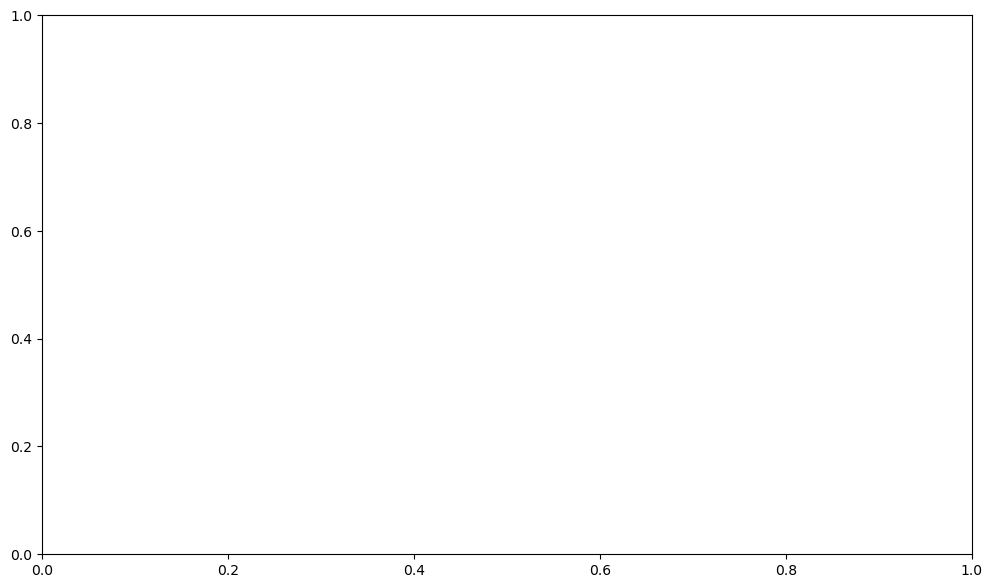

In [42]:
ratios = [d / e * 100 if e != 0 else 0 for d, e in zip(dementia_quantity, elder_quantity)]

# 打印比率结果
for year, ratio in zip(years, ratios):
    print(f"Year: {year}, Dementia Ratio: {ratio:.2f}%")

# 绘制柱状图
x = np.arange(len(years))  # x轴的位置
width = 0.35  # 柱子的宽度

plt.figure(figsize=(12, 7))

# 绘制老人人口柱状图
plt.bar(x - width/2, elder_quantity, width=width, label='Elder Quantity',color='#330066')

# 绘制痴呆人口柱状图
plt.bar(x + width/2, dementia_quantity, width=width, label='Dementia Quantity',color='orange')

# 添加标题和标签
plt.title('Elder and Dementia Quantity Over Years')
plt.xlabel('Year')
plt.ylabel('Quantity / Ratio (%)')

# 设置x轴刻度
plt.xticks(x, years)

# 添加图例
plt.legend()

# 显示图像
plt.show()

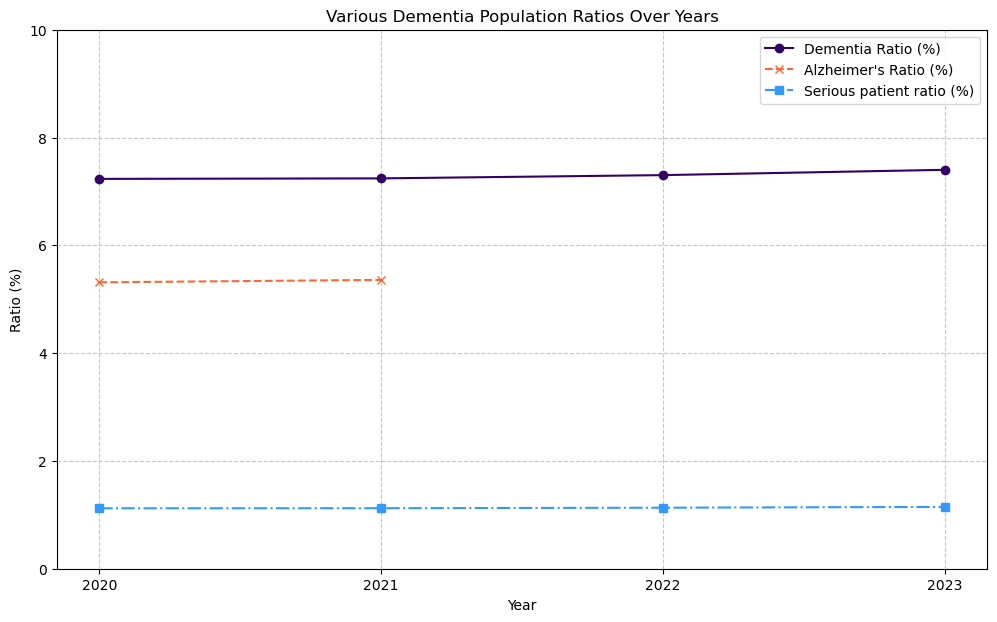

In [ ]:
dementia_ratios = [d / e * 100 if e != 0 else 0 for d, e in zip(dementia_quantity, elder_quantity)]
alzheimers_ratios = [a / e * 100 if e != 0 else 0 for a, e in zip(alzheimers_quantity, elder_quantity)]
serious_patient_ratios = [s / e * 100 if e != 0 else 0 for s, e in zip(serious_patient, elder_quantity)]

# 绘制比率折线图
plt.figure(figsize=(12, 7))

# 绘制多条折线
plt.plot(years, dementia_ratios, marker='o', linestyle='-', color="#330066", label='Dementia Ratio (%)')
plt.plot(years, alzheimers_ratios, marker='x', linestyle='--', color="#FF6633", label='Alzheimer\'s Ratio (%)')
plt.plot(years, serious_patient_ratios, marker='s', linestyle='-.', color="#3399FF", label='Serious patient ratio (%)')

# 添加标题和标签
plt.title('Various Dementia Population Ratios Over Years')
plt.xlabel('Year')
plt.ylabel('Ratio (%)')

# 设置x轴刻度
plt.xticks(years)

# 设置y轴范围
plt.ylim(0, 10)  # 根据需要调整y轴范围

# 添加网格
plt.grid(True, linestyle='--', alpha=0.7)

# 添加图例
plt.legend()

# 显示图像
plt.show()